In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract
import winsound

from sklearn.feature_selection import mutual_info_classif

from analyse_url import *

In [10]:
df = pd.read_csv('data/clean_data.csv')

df

,url,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,b-hls-03.doppiocdn.net,legitimate,22,False,3.913977,False,0.125000,2,0,2,0,False,1,0.314494,False,0.020552
1,https://paypal-securityin.org/signin21,phishing,38,False,4.201232,False,0.066667,1,0,1,0,False,0,0.565388,False,0.000000
2,modularscale.com,legitimate,16,False,3.375000,False,0.000000,1,0,0,0,False,0,0.250000,False,0.121470
3,teamapps.crm4.dynamics.com,legitimate,26,False,3.690260,False,0.045455,3,0,0,0,False,2,0.359478,False,0.243907
4,itninja.com,legitimate,11,False,3.095795,False,0.000000,1,0,0,0,False,0,0.314494,False,0.197312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,http://xn--r1a.website/s/ogorodru,phishing,33,False,4.187889,False,0.041667,1,0,2,0,True,0,0.674738,False,0.042005
2499988,ca.apm.activecommunities.com,legitimate,28,False,3.512188,False,0.000000,3,0,0,0,False,2,0.345256,False,0.169075
2499989,plus.ai,legitimate,7,False,2.807355,False,0.000000,1,0,0,0,False,0,0.401051,False,0.000000
2499990,www.lfclift.com,legitimate,15,False,3.056565,False,0.000000,2,0,0,0,False,1,0.387585,False,0.022243


In [11]:
analyser = URLAnalyzer()
conv = analyser.analyse_url(*df.url)
conv

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,22,False,3.913977,False,0.125000,2,0,2,0,False,0,0.628988,False,-1
1,38,False,4.201232,False,0.066667,1,0,1,0,False,0,0.703492,False,-1
2,16,False,3.375000,False,0.000000,1,0,0,0,False,0,0.250000,False,-1
3,26,False,3.690260,False,0.045455,3,0,0,0,False,0,0.359478,False,-1
4,11,False,3.095795,False,0.000000,1,0,0,0,False,0,0.314494,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,33,False,4.187889,True,0.041667,1,0,2,0,True,0,0.919853,False,-1
2499988,28,False,3.512188,False,0.000000,3,0,0,0,False,0,0.345256,False,-1
2499989,7,False,2.807355,False,0.000000,1,0,0,0,False,0,0.401051,False,-1
2499990,15,False,3.056565,False,0.000000,2,0,0,0,False,0,0.387585,False,-1


In [12]:
X = df.copy()
y = X.pop('label')

X.pop('url')

X

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,22,False,3.913977,False,0.125000,2,0,2,0,False,1,0.314494,False,0.020552
1,38,False,4.201232,False,0.066667,1,0,1,0,False,0,0.565388,False,0.000000
2,16,False,3.375000,False,0.000000,1,0,0,0,False,0,0.250000,False,0.121470
3,26,False,3.690260,False,0.045455,3,0,0,0,False,2,0.359478,False,0.243907
4,11,False,3.095795,False,0.000000,1,0,0,0,False,0,0.314494,False,0.197312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,33,False,4.187889,False,0.041667,1,0,2,0,True,0,0.674738,False,0.042005
2499988,28,False,3.512188,False,0.000000,3,0,0,0,False,2,0.345256,False,0.169075
2499989,7,False,2.807355,False,0.000000,1,0,0,0,False,0,0.401051,False,0.000000
2499990,15,False,3.056565,False,0.000000,2,0,0,0,False,1,0.387585,False,0.022243


In [13]:
y

0          legitimate
1            phishing
2          legitimate
3          legitimate
4          legitimate
              ...    
2499987      phishing
2499988    legitimate
2499989    legitimate
2499990    legitimate
2499991      phishing
Name: label, Length: 2499992, dtype: object

In [17]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [18]:
mi_scores = make_mi_scores(X, y, discrete_features)
winsound.Beep(1000, 500)

In [19]:
mi_scores

nan_char_entropy      0.693927
url_entropy           0.427106
url_length            0.382152
domain_age_days       0.316239
digit_letter_ratio    0.151252
dot_count             0.063978
dash_count            0.044387
subdomain_count       0.023094
has_internal_links    0.016745
tld_count             0.016745
domain_has_digits     0.010058
starts_with_ip        0.007466
at_count              0.006798
has_punycode          0.000104
Name: MI Scores, dtype: float64

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

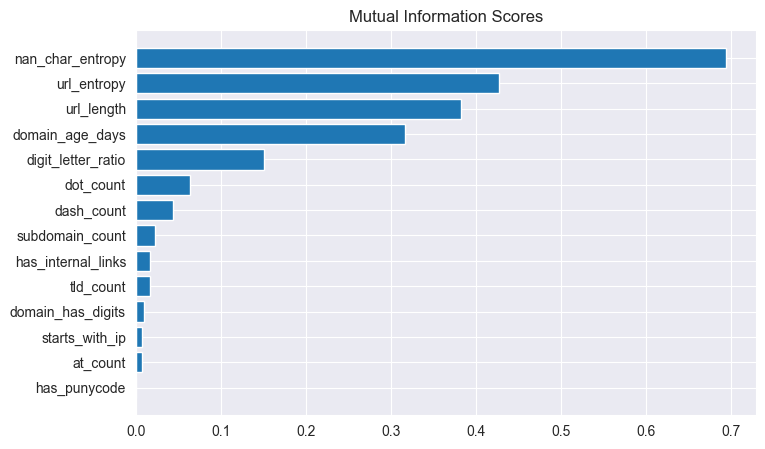

In [21]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

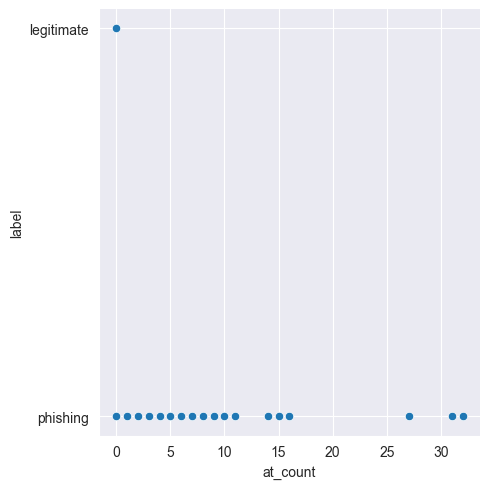

In [27]:
sns.relplot(x='at_count', y='label', data=df)

In [24]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", )
    return df.describe().transpose()


# Call the function
get_df_info(df)


Shape of DataFrame:  (2499992, 16)

Columns in DataFrame:  ['url', 'label', 'url_length', 'starts_with_ip', 'url_entropy', 'has_punycode', 'digit_letter_ratio', 'dot_count', 'at_count', 'dash_count', 'tld_count', 'domain_has_digits', 'subdomain_count', 'nan_char_entropy', 'has_internal_links', 'domain_age_days']

Data types of columns:
 url                    object
label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
domain_age_days       float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499992 entries, 0 to 2499991
Data columns (total 16 columns):
 #   Column            

,count,mean,std,min,25%,50%,75%,max
url_length,2499992.0,45.875977,74.151583,4.000000,17.000000,29.000000,52.000000,25523.000000
url_entropy,2499992.0,3.907980,0.635715,0.100836,3.452820,3.911860,4.329283,6.048781
digit_letter_ratio,2499992.0,0.116857,0.245145,0.000000,0.000000,0.000000,0.133333,20.840000
dot_count,2499992.0,2.174578,1.736377,0.000000,1.000000,2.000000,3.000000,211.000000
at_count,2499992.0,0.011416,0.140731,0.000000,0.000000,0.000000,0.000000,32.000000
dash_count,2499992.0,0.741024,1.662581,0.000000,0.000000,0.000000,1.000000,322.000000
tld_count,2499992.0,0.039229,0.390500,0.000000,0.000000,0.000000,0.000000,65.000000
subdomain_count,2499992.0,0.777701,1.103259,0.000000,0.000000,1.000000,1.000000,43.000000
nan_char_entropy,2499992.0,0.465160,0.188002,0.016863,0.306397,0.415452,0.618469,1.901504
domain_age_days,2499992.0,0.074734,0.078572,0.000000,0.000000,0.049625,0.134865,1.000000
